In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing

In [2]:
# importamos el archivo de un equipo #Serie E162533
init_df = pd.read_excel("equipo-E162533.xlsx")
init_df

,fecha,vel_motor,voltaje,mensaje_volt,horas_comp_trabajadas,temp_planta,Lamps,Lead Curtains,Radiation_mrh,problemas_rechazo,...,rep_filtro_aire,rep_tubo,rep_tarjeta_detector,rep_IOB,rep_otras_tarj,rep_motor,rep_software,rep_PILZ,rep_shutter,rep_cables
0,2017-02-01,26,219,0,8,28,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-02-02,22,222,0,9,25,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-02-03,24,217,0,9,30,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-02-04,22,216,0,9,29,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-02-05,24,222,0,8,26,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,2021-08-06,27,217,0,8,29,2,2,0.05,0,...,0,0,0,0,0,0,0,0,0,0
1648,2021-08-07,27,222,0,9,30,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
1649,2021-08-08,20,217,0,8,25,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
1650,2021-08-09,19,217,0,8,26,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  1652 non-null   datetime64[ns]
 1   vel_motor              1652 non-null   int64         
 2   voltaje                1652 non-null   int64         
 3   mensaje_volt           1652 non-null   int64         
 4   horas_comp_trabajadas  1652 non-null   int64         
 5   temp_planta            1652 non-null   int64         
 6   Lamps                  1652 non-null   int64         
 7   Lead Curtains          1652 non-null   int64         
 8   Radiation_mrh          1652 non-null   float64       
 9   problemas_rechazo      1652 non-null   int64         
 10  mantenimiento          1652 non-null   int64         
 11  rep_filtro_aire        1652 non-null   int64         
 12  rep_tubo               1652 non-null   int64         
 13  rep

In [4]:
cols = list(init_df.columns)
cols.remove("mantenimiento")
cols.remove("fecha")
cols

['vel_motor',
 'voltaje',
 'mensaje_volt',
 'horas_comp_trabajadas',
 'temp_planta',
 'Lamps',
 'Lead Curtains',
 'Radiation_mrh',
 'problemas_rechazo',
 'rep_filtro_aire',
 'rep_tubo',
 'rep_tarjeta_detector',
 'rep_IOB',
 'rep_otras_tarj',
 'rep_motor',
 'rep_software',
 'rep_PILZ',
 'rep_shutter',
 'rep_cables']

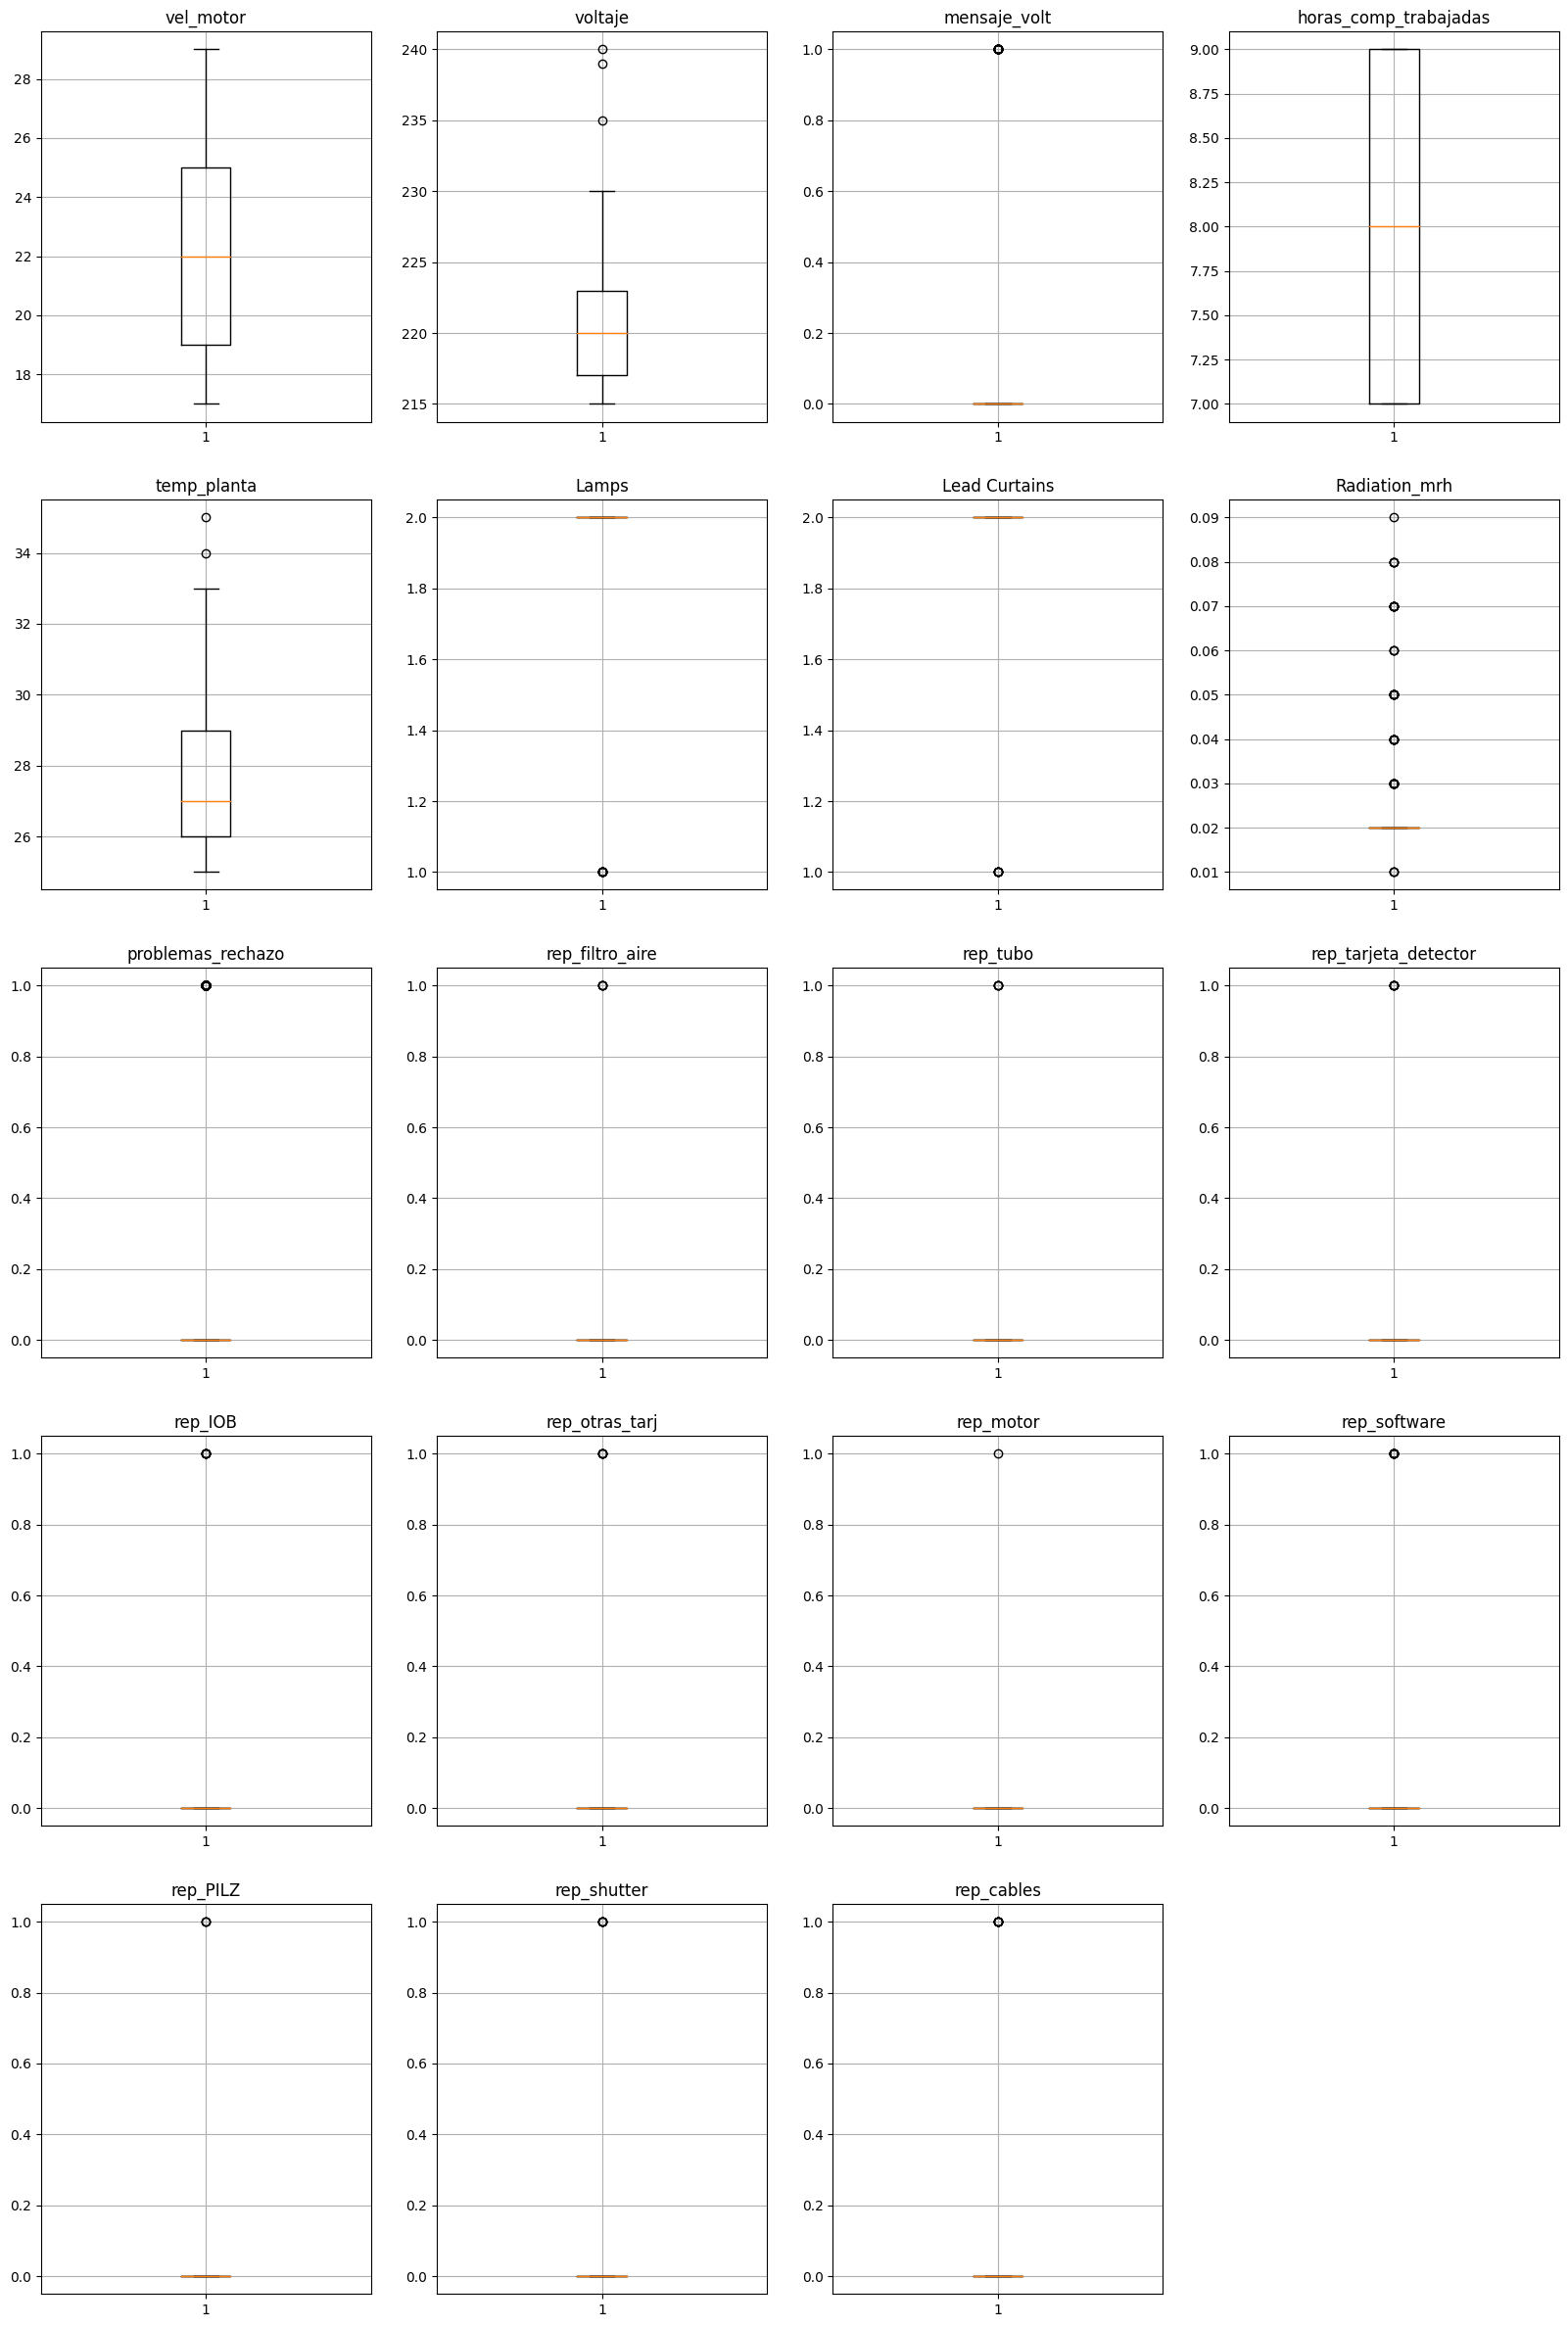

In [5]:
# sacamos los boxplots para ver si hay outliers
plt.figure(figsize=(20,30))
i = 1
for col in cols:
    plt.subplot(5,4,i)
    i += 1
    plt.boxplot(init_df[col])
    plt.title(col)
    plt.grid(True)
    
plt.show()
    

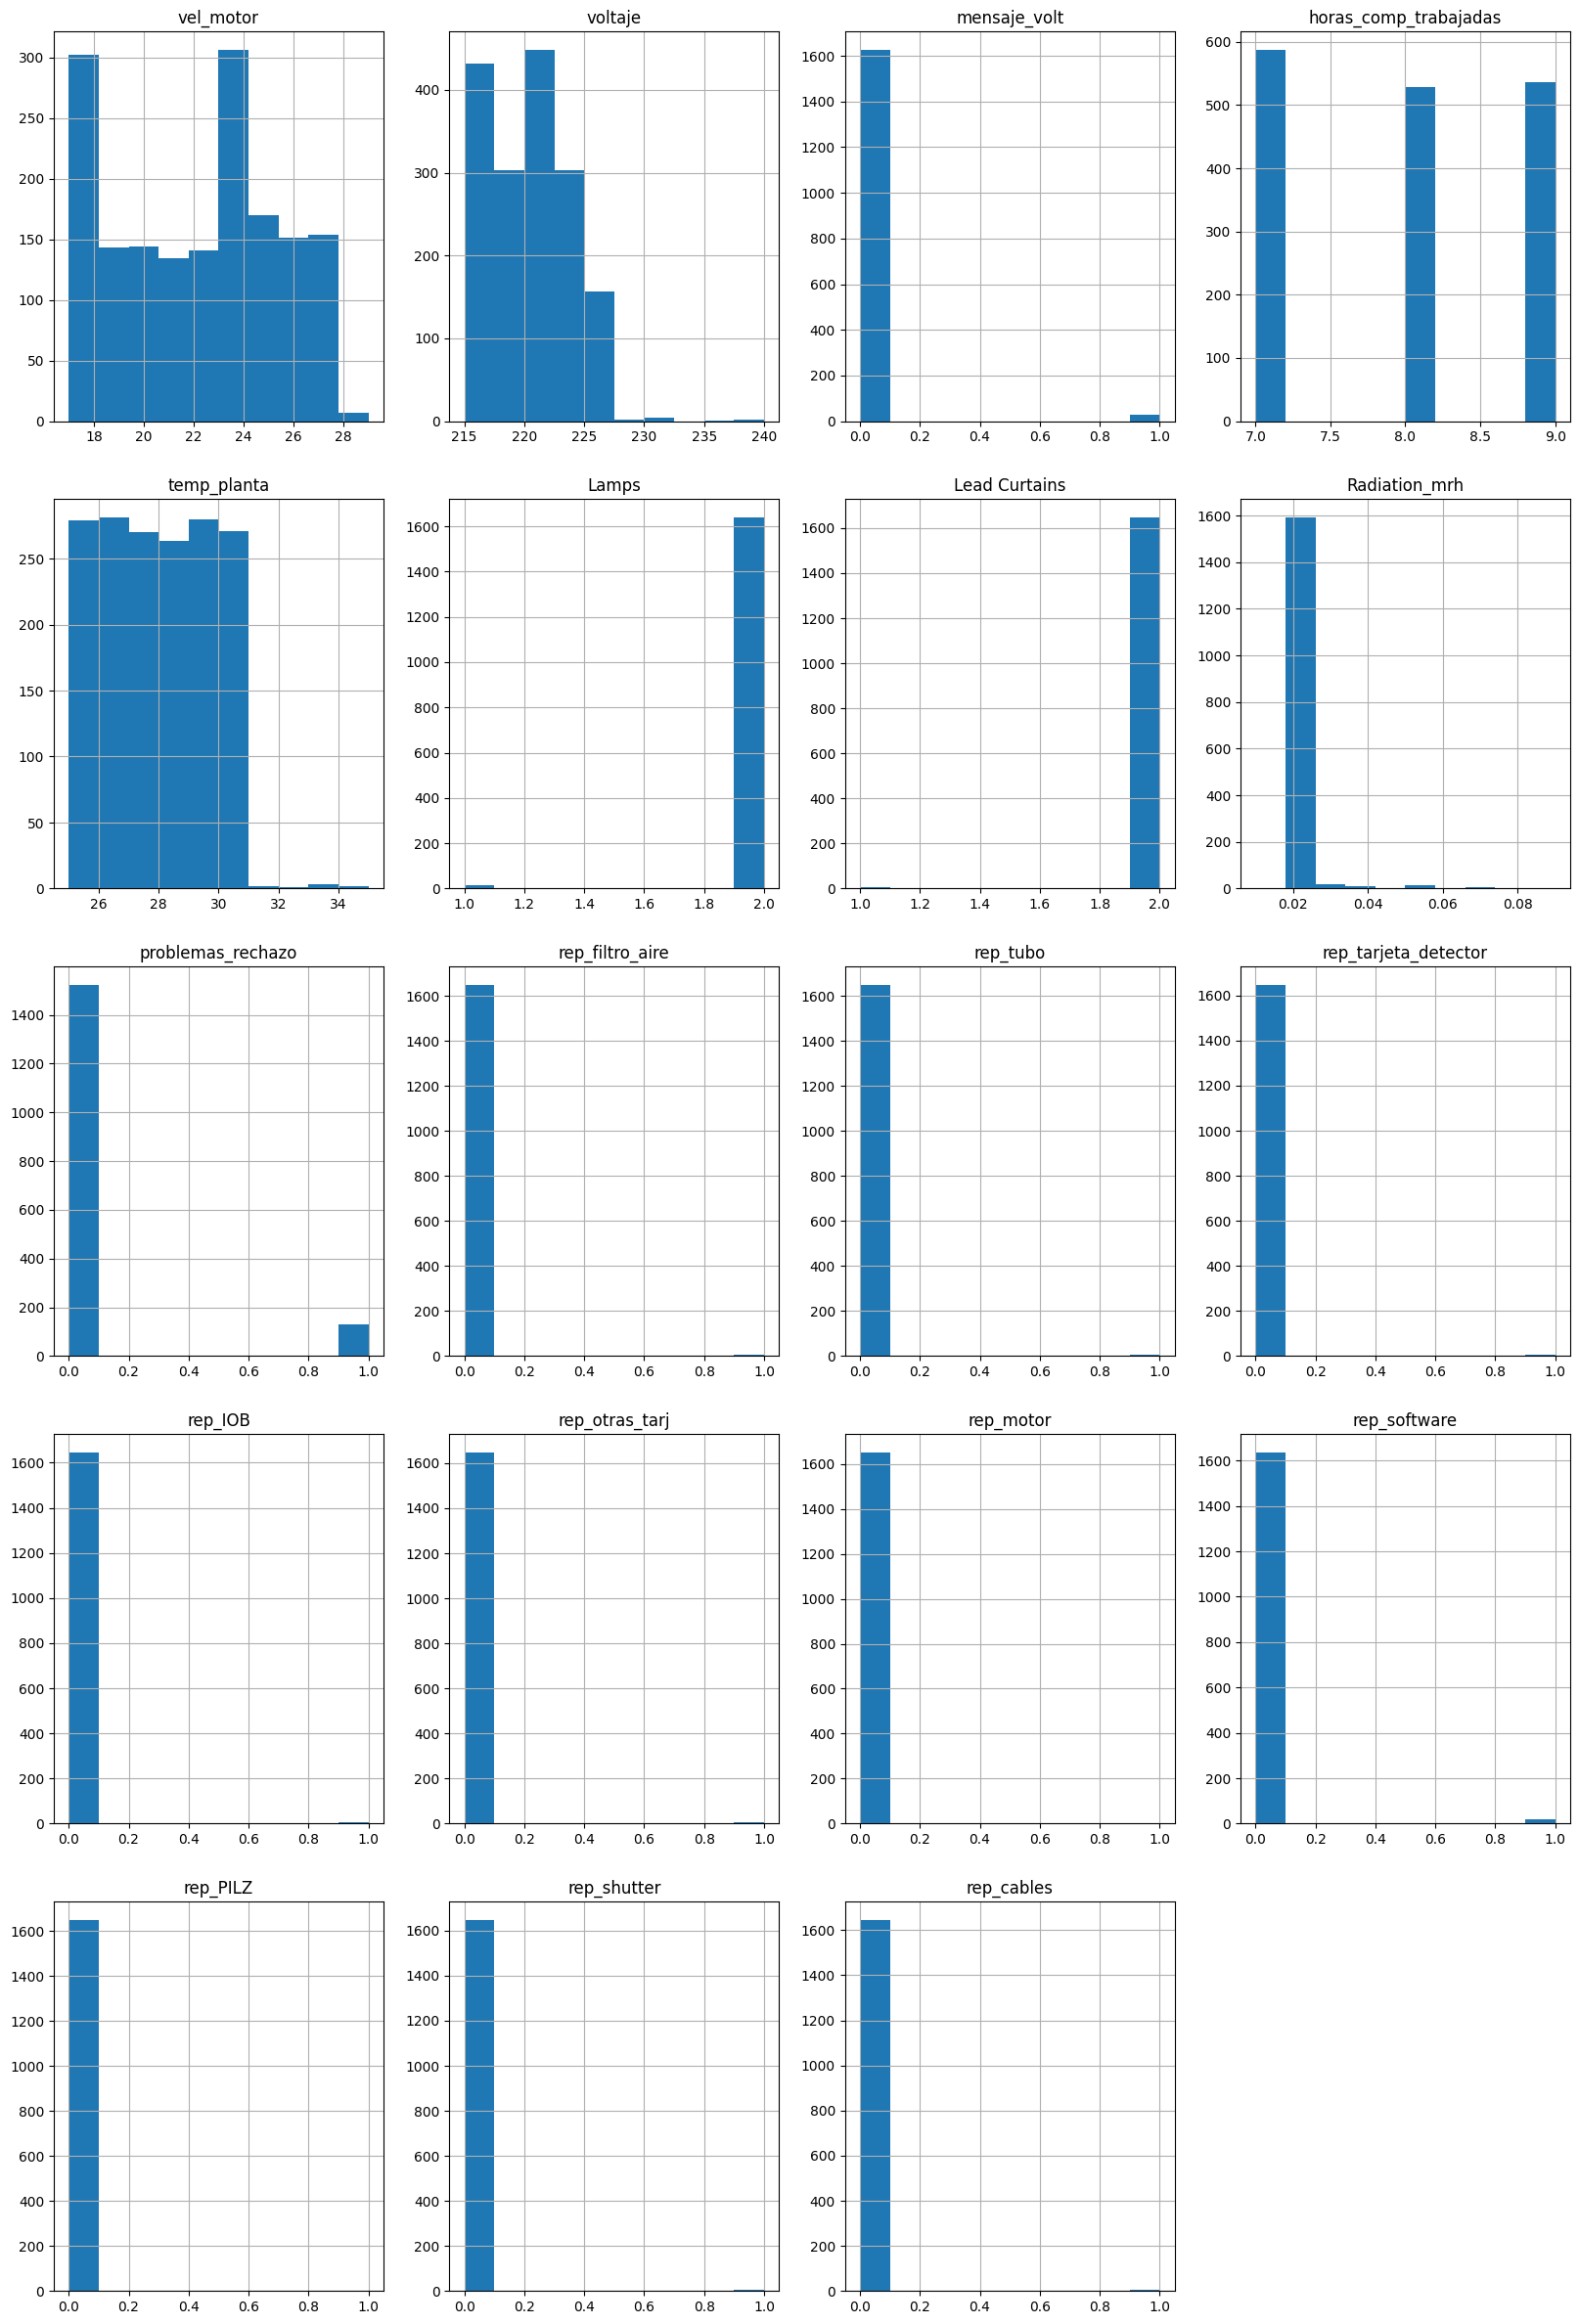

In [6]:
# sacamos los histogramas para ver qué valores hay
plt.figure(figsize=(20,30))
i = 1
for col in cols:
    plt.subplot(5,4,i)
    i += 1
    plt.hist(init_df[col])
    plt.title(col)
    plt.grid(True)
    
plt.show()

In [7]:
#normalizamos los valores
std_df = init_df.copy()[cols]
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(std_df)
std_df = mm_scaler.transform(std_df)
std_df

array([[0.75      , 0.16      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41666667, 0.28      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.08      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25      , 0.08      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.08      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

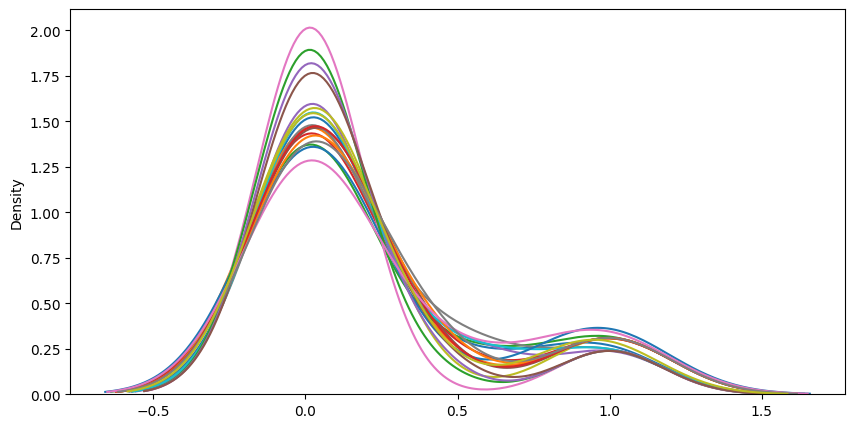

In [13]:
# sacamos las distribuciones de los datos
plt.figure(figsize=(10,5))
i = 1
for col in cols:
    #plt.subplot(5,4,i)
    sn.kdeplot(std_df[i-1])
    i += 1
    #plt.grid(True)
    
plt.show()

In [15]:
# dividimos datos de entrenamiento y prueba
X = init_df[cols]
y = init_df['mantenimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [22]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [25]:
feature_imp = pd.Series(clf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp.head()

rep_software            0.337596
rep_cables              0.110177
rep_IOB                 0.102008
rep_tarjeta_detector    0.089049
rep_shutter             0.072126
dtype: float64